<a href="https://colab.research.google.com/github/ricardorocha86/Python-para-Machine-Learning/blob/master/Simulacao_da_Copa_de_Futebol_das_Olimpiadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simulação da Copa de Futebol das Olimpíadas!**

## **Objetivo**

Investigar as probabilidades dos jogos de futebol na Copa das Olimpíadas de Tóquio 2021.

## **Perguntas** 

1. Qual seleção é mais provável ser campeã?
2. Quais as probabilidades das seleções avançarem para segunda fase?
3. Quais as probabilidades das seleções ficarem em 1º, 2º, 3º e 4º em seus grupos na primeira fase?
4. A força de uma equipe é proporcional a sua probabilidade de vencer a competição? Se não, porquê?
5. Qual a probabilidade de todos cabeça de chave passarem simultâneamente para a segunda fase? (Probabilidade da 'zebra')

6. Qual a probabilidade de pelo menos uma das quatro seleções mais fracas ganhar a competição?
7. Qual a probabilidade de vencer a competição por confederação?
8. Qual a probabilidade de uma seleção sem medalhas em sua história vencer a competição?

9. Se o Brasil jogar com a Alemanha, qual a probabilidade de acontecer um 7x1 para a Alemanha? E um 7x1 para o Brasil? Quais os placares mais prováveis?
10. Qual a probabilidade de cada grupo apresentar um campeão?




![](https://pbs.twimg.com/media/EzfBqoFXMAAdvOR?format=jpg&name=large)

## Importação dos Dados

In [109]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson
from collections import Counter

In [2]:
from google.colab import auth
auth.authenticate_user()

from oauth2client.client import GoogleCredentials
import gspread
gc = gspread.authorize(GoogleCredentials.get_application_default())
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1dJrLGRMZvk-NU1O2AyNKFoIgTtrvosBKpof-fzBOWVE/edit#gid=0')

In [3]:
planilha = wb.worksheet('seleções')
dados_cru = planilha.get_all_values()
dados = pd.DataFrame(dados_cru)
dados.head()

,0,1,2,3,4,5,6,7,8,9,10
0,País,Nome FIFA,Grupo,Confederação,Bandeira,Cabeça-de-chave,Ranking FIFA (07/04),Pontuação FIFA (07/04),Ouros,Pratas,Bronzes
1,França,France,A,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,2,1757,1,1,0
2,Brasil,Brazil,D,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Sim,3,1742,1,3,2
3,Espanha,Spain,C,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,6,1648,1,2,0
4,Argentina,Argentina,C,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Não,8,1641,2,2,0


In [4]:
dados.columns = dados.iloc[0]
dados = dados.iloc[1:]
dados

,País,Nome FIFA,Grupo,Confederação,Bandeira,Cabeça-de-chave,Ranking FIFA (07/04),Pontuação FIFA (07/04),Ouros,Pratas,Bronzes
1,França,France,A,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,2,1757,1,1,0
2,Brasil,Brazil,D,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Sim,3,1742,1,3,2
3,Espanha,Spain,C,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,6,1648,1,2,0
4,Argentina,Argentina,C,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Não,8,1641,2,2,0
5,México,Mexico,A,CONCACAF,https://upload.wikimedia.org/wikipedia/commons...,Não,11,1629,1,0,0
6,Alemanha,Germany,D,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Não,12,1609,1,1,1
7,Honduras,Honduras,B,CONCACAF,https://upload.wikimedia.org/wikipedia/commons...,Não,67,1361,0,0,0
8,Japão,Japan,A,AFC,https://upload.wikimedia.org/wikipedia/commons...,Não,28,1509,0,0,0
9,Romênia,Romania,B,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Não,43,1449,0,0,0
10,Coréia do Sul,Korea Republic,B,AFC,https://upload.wikimedia.org/wikipedia/commons...,Sim,39,1460,0,0,0


## Gráficos dos Grupos



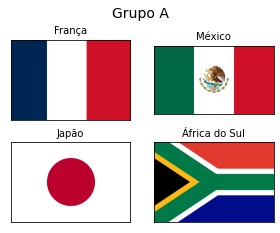

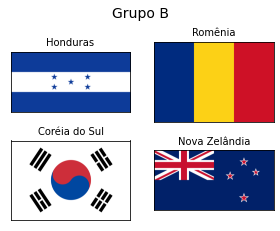

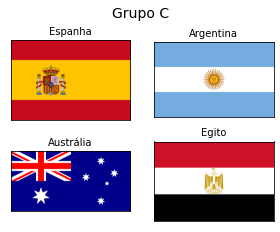

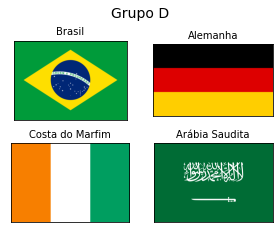

In [6]:
def plotgrupo(grupo = 'A', salvar = False):
    d = dados.loc[dados['Grupo'] == grupo]
    fig = plt.figure(figsize = (4, 3))
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1) 
        a = plt.imread(d['Bandeira'].iloc[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.title(d['País'].iloc[i], size = 10)
        plt.imshow(a)
    plt.tight_layout(w_pad = 2) 
    plt.suptitle('Grupo ' + grupo, size = 14, y = 1.05)
    if salvar:
        plt.savefig('grupo' + grupo + '.png', transparent = True)

plotgrupo('A', True)
plotgrupo('B')
plotgrupo('C')
plotgrupo('D')

## Criando a variável **Força** de cada seleção

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 1 to 16
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   País                    16 non-null     object
 1   Nome FIFA               16 non-null     object
 2   Grupo                   16 non-null     object
 3   Confederação            16 non-null     object
 4   Bandeira                16 non-null     object
 5   Cabeça-de-chave         16 non-null     object
 6   Ranking FIFA (07/04)    16 non-null     object
 7   Pontuação FIFA (07/04)  16 non-null     object
 8   Ouros                   16 non-null     object
 9   Pratas                  16 non-null     object
 10  Bronzes                 16 non-null     object
dtypes: object(11)
memory usage: 1.5+ KB


In [9]:
for i in ['Ranking FIFA (07/04)', 'Pontuação FIFA (07/04)', 'Ouros', 'Pratas', 'Bronzes']:
    dados[i] = dados[i].astype(int)

In [106]:
M = max(dados['Pontuação FIFA (07/04)'])
dados['Força'] = (1.2 * dados['Pontuação FIFA (07/04)']/M)**2

In [107]:
dados

,País,Nome FIFA,Grupo,Confederação,Bandeira,Cabeça-de-chave,Ranking FIFA (07/04),Pontuação FIFA (07/04),Ouros,Pratas,Bronzes,Força
1,França,France,A,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,2,1757,1,1,0,1.440000
2,Brasil,Brazil,D,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Sim,3,1742,1,3,2,1.415518
3,Espanha,Spain,C,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,6,1648,1,2,0,1.266874
4,Argentina,Argentina,C,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Não,8,1641,2,2,0,1.256134
5,México,Mexico,A,CONCACAF,https://upload.wikimedia.org/wikipedia/commons...,Não,11,1629,1,0,0,1.237830
6,Alemanha,Germany,D,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Não,12,1609,1,1,1,1.207622
7,Honduras,Honduras,B,CONCACAF,https://upload.wikimedia.org/wikipedia/commons...,Não,67,1361,0,0,0,0.864043
8,Japão,Japan,A,AFC,https://upload.wikimedia.org/wikipedia/commons...,Não,28,1509,0,0,0,1.062178
9,Romênia,Romania,B,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Não,43,1449,0,0,0,0.979390
10,Coréia do Sul,Korea Republic,B,AFC,https://upload.wikimedia.org/wikipedia/commons...,Sim,39,1460,0,0,0,0.994317


---

## Início das funções da simulação



In [19]:
# Função que retorna o resultado V, D ou E para as entradas dos gols de cada equipe eu uma partida simulada

def Resultado(gols1, gols2):
    if gols1 > gols2:
        res = 'V'
    if gols1 < gols2:
        res = 'D' 
    if gols1 == gols2:
        res = 'E'       
    return res

Resultado(2,2)

'E'

In [21]:
# Retorna os pontos de cada equipe ao fim da partida (primeira fase da copa)

def Pontos(gols1, gols2):
    rst = Resultado(gols1, gols2)
    if rst == 'V':
        pontos1, pontos2 = 3, 0
    if rst == 'E':
        pontos1, pontos2 = 1, 1
    if rst == 'D':
        pontos1, pontos2 = 0, 3
    return pontos1, pontos2, rst

Pontos(1, 2)

(0, 3, 'D')

In [56]:
# Função para apresentar os resultados de cada jogo. 
# Entre a força das duas equipes e retorna os detalhes da partida simulada pela VA Poisson

def Jogo(time1, time2):
    gols1 = int(poisson.rvs(mu = time1, size = 1))
    gols2 = int(poisson.rvs(mu = time2, size = 1)) 
    saldo1 = gols1 - gols2
    saldo2 = -saldo1
    pontos1, pontos2, result = Pontos(gols1, gols2)
    placar = '{}x{}'.format(gols1, gols2)
    return [gols1, gols2, saldo1, saldo2, pontos1, pontos2, result, placar]

Jogo(1.2, 0.8)

[2, 1, 1, -1, 3, 0, 'V', '2x1']

In [57]:
dados.loc[dados['Grupo'] == 'A'][['País', 'Força']].reset_index(drop = True)

,País,Força
0,França,1.314534
1,México,1.173534
2,Japão,1.046280
3,África do Sul,0.860871


In [71]:
def JogosGrupo(dados, grupo): 
    aux = dados.loc[dados['Grupo'] == grupo][['País', 'Força']].reset_index(drop = True)

    time1, time2, time3, time4 = aux['Força']
    nome1, nome2, nome3, nome4 = aux['País']

    pt1, pt2, pt3, pt4 = 0, 0, 0, 0
    gp1, gp2, gp3, gp4 = 0, 0, 0, 0
    sg1, sg2, sg3, sg4 = 0, 0, 0, 0

    jogo1 = Jogo(time1, time2)
    jogo2 = Jogo(time3, time4)

    jogo3 = Jogo(time1, time3)
    jogo4 = Jogo(time2, time4)

    jogo5 = Jogo(time1, time4)
    jogo6 = Jogo(time2, time3)

    gp1, gp2, sg1, sg2, pt1, pt2 = gp1 + jogo1[0], gp2 + jogo1[1], sg1 + jogo1[2], sg2 + jogo1[3], pt1 + jogo1[4], pt2 + jogo1[5]
    gp3, gp4, sg3, sg4, pt3, pt4 = gp3 + jogo2[0], gp4 + jogo2[1], sg3 + jogo2[2], sg4 + jogo2[3], pt3 + jogo2[4], pt4 + jogo2[5]
    gp1, gp3, sg1, sg3, pt1, pt3 = gp1 + jogo3[0], gp3 + jogo3[1], sg1 + jogo3[2], sg3 + jogo3[3], pt1 + jogo3[4], pt3 + jogo3[5]
    gp2, gp4, sg2, sg4, pt2, pt4 = gp2 + jogo4[0], gp4 + jogo4[1], sg2 + jogo4[2], sg4 + jogo4[3], pt2 + jogo4[4], pt4 + jogo4[5]
    gp1, gp4, sg1, sg4, pt1, pt4 = gp1 + jogo5[0], gp4 + jogo5[1], sg1 + jogo5[2], sg4 + jogo5[3], pt1 + jogo5[4], pt4 + jogo5[5]
    gp2, gp3, sg2, sg3, pt2, pt3 = gp2 + jogo6[0], gp3 + jogo6[1], sg2 + jogo6[2], sg3 + jogo6[3], pt2 + jogo6[4], pt3 + jogo6[5]

    partidas = [ nome1 + ' x ' + nome2, nome3 + ' x ' + nome4, nome1 + ' x ' + nome3, 
                 nome2 + ' x ' + nome4, nome1 + ' x ' + nome4, nome2 + ' x ' + nome3 ]
    resultados = [ jogo1[6], jogo2[6], jogo3[6], jogo4[6], jogo5[6], jogo6[6] ]
    placares = [ jogo1[-1], jogo2[-1], jogo3[-1], jogo4[-1], jogo5[-1], jogo6[-1] ]
    linhas = aux['País']
    cols = ['Pontos', 'Saldo de Gols', 'Gols Pró']
    tab = pd.DataFrame([[pt1, pt2, pt3, pt4], [sg1, sg2, sg3, sg4], [gp1, gp2, gp3, gp4]], index = cols, columns = linhas).transpose()
    
    tab = tab.sort_values(['Pontos', 'Saldo de Gols', 'Gols Pró'], ascending = False)
    tab['Posição'] = [1, 2, 3, 4]

    jogos = pd.DataFrame([partidas, placares, resultados]).transpose()
    jogos.columns = ['Partida', 'Placar', 'Resultado']

    return [tab, jogos]

JogosGrupo(dados, 'D')    

[                 Pontos  Saldo de Gols  Gols Pró  Posição
 País                                                     
 Brasil                7              8        11        1
 Alemanha              4              0         5        2
 Costa do Marfim       3             -2         4        3
 Arábia Saudita        3             -6         4        4,
                             Partida Placar Resultado
 0                 Brasil x Alemanha    1x1         E
 1  Costa do Marfim x Arábia Saudita    0x2         D
 2          Brasil x Costa do Marfim    3x2         V
 3         Alemanha x Arábia Saudita    3x2         V
 4           Brasil x Arábia Saudita    7x0         V
 5        Alemanha x Costa do Marfim    1x2         D]

In [95]:
def JogoMataMata(sel1, sel2):
    time1 = dados.loc[dados['País'] == sel1]['Força']
    time2 = dados.loc[dados['País'] == sel2]['Força']
    gols1 = int(poisson.rvs(mu = time1, size = 1))
    gols2 = int(poisson.rvs(mu = time2, size = 1))  
    resultado = Resultado(gols1, gols2)
    if resultado == 'E':
        resultado = random.sample(['V', 'D'], 1)
    placar = '{}x{}'.format(gols1, gols2)
    vencedor = sel1 if resultado == 'V' else sel2
    return vencedor
 
JogoMataMata('Brasil', 'Argentina')

'Brasil'

**Quartas de final**

1: 1A vs 2B\
2: 1B vs 2A\
3: 1C vs 2D\
4: 1D vs *2C*

In [97]:
    cols = ['1st', '2nd', '3th', '4th', 'Quartas', 'Semis', 'Final', 'Campeão']
    lins = dados['País'].to_list()
    n = len(lins)
    m = len(cols)
    aux = np.array(np.zeros(n*m).reshape(n, m))
    info = pd.DataFrame(aux, columns = cols, index = lins) 
    info = info.astype(int)
    info

,1st,2nd,3th,4th,Quartas,Semis,Final,Campeão
França,0,0,0,0,0,0,0,0
Brasil,0,0,0,0,0,0,0,0
Espanha,0,0,0,0,0,0,0,0
Argentina,0,0,0,0,0,0,0,0
México,0,0,0,0,0,0,0,0
Alemanha,0,0,0,0,0,0,0,0
Honduras,0,0,0,0,0,0,0,0
Japão,0,0,0,0,0,0,0,0
Romênia,0,0,0,0,0,0,0,0
Coréia do Sul,0,0,0,0,0,0,0,0


In [104]:
def SimulaCopa(dados):
    cols = ['1st', '2nd', '3th', '4th', 'Quartas', 'Semis', 'Final', 'Campeão']
    lins = dados['País'].to_list()
    n = len(lins)
    m = len(cols)
    aux = np.array(np.zeros(n*m).reshape(n, m))
    info = pd.DataFrame(aux, columns = cols, index = lins) 
    info = info.astype(int)

    top8 = []
    for i in list('ABCD'):
        a = JogosGrupo(dados, i)[0] 
        top8 += a.index[:2].tolist()
        anomes = a.index.to_list() 
        info.at[anomes[0], '1st'] = 1
        info.at[anomes[1], '2nd'] = 1
        info.at[anomes[2], '3th'] = 1
        info.at[anomes[3], '4th'] = 1

    sf1 = JogoMataMata(top8[0], top8[3])
    sf2 = JogoMataMata(top8[2], top8[1])
    sf3 = JogoMataMata(top8[4], top8[7])
    sf4 = JogoMataMata(top8[6], top8[5])

    top4 = [sf1, sf2, sf3, sf4]

    f1 = JogoMataMata(sf1, sf2)
    f2 = JogoMataMata(sf3, sf4)

    top2 = [f1, f2]

    top1 = [JogoMataMata(f1, f2)]

    info.at[top8, 'Quartas'] = 1
    info.at[top4, 'Semis'] = 1
    info.at[top2, 'Final'] = 1
    info.at[top1, 'Campeão'] = 1
    return info

SimulaCopa(dados)

,1st,2nd,3th,4th,Quartas,Semis,Final,Campeão
França,0,0,1,0,0,0,0,0
Brasil,1,0,0,0,1,0,0,0
Espanha,1,0,0,0,1,0,0,0
Argentina,0,1,0,0,1,1,1,0
México,1,0,0,0,1,1,1,1
Alemanha,0,0,1,0,0,0,0,0
Honduras,0,0,0,1,0,0,0,0
Japão,0,1,0,0,1,1,0,0
Romênia,1,0,0,0,1,0,0,0
Coréia do Sul,0,1,0,0,1,0,0,0


In [108]:
def SimulacaoTotal(dados, S = 1000): 
    print('Iniciando simulação...')
    info = SimulaCopa(dados)
    for i in range(S-1):
        info += SimulaCopa(dados)
        if (i+2)%(S/10) == 0:
            print('Simulando Copa: {:.0f}% pronto'.format(100*((i+2)/S)))
    return info.sort_values(by = 'Campeão', ascending = False)/S

sim = SimulacaoTotal(dados, 1000)
sim

Iniciando simulação...
Simulando Copa: 10% pronto
Simulando Copa: 20% pronto
Simulando Copa: 30% pronto
Simulando Copa: 40% pronto
Simulando Copa: 50% pronto
Simulando Copa: 60% pronto
Simulando Copa: 70% pronto
Simulando Copa: 80% pronto
Simulando Copa: 90% pronto
Simulando Copa: 100% pronto


,1st,2nd,3th,4th,Quartas,Semis,Final,Campeão
Brasil,0.446,0.247,0.186,0.121,0.693,0.376,0.210,0.139
Espanha,0.319,0.265,0.220,0.196,0.584,0.296,0.161,0.118
França,0.379,0.292,0.209,0.120,0.671,0.423,0.256,0.112
Alemanha,0.273,0.285,0.242,0.200,0.558,0.294,0.151,0.100
Argentina,0.329,0.279,0.234,0.158,0.608,0.295,0.154,0.099
Austrália,0.181,0.237,0.270,0.312,0.418,0.204,0.113,0.074
México,0.292,0.274,0.240,0.194,0.566,0.323,0.187,0.065
Egito,0.171,0.219,0.276,0.334,0.390,0.176,0.092,0.055
Japão,0.220,0.262,0.270,0.248,0.482,0.276,0.145,0.046
Costa do Marfim,0.134,0.252,0.309,0.305,0.386,0.183,0.060,0.037


In [110]:
def SimulaJogo(eq1, eq2, dados = dados, S = 1000):
    forca1 = dados.loc[dados['País'] == eq1]['Força']
    forca2 = dados.loc[dados['País'] == eq2]['Força']
      
    resultados = [] 
    placares = []
    for i in range(S):
        jogo = Jogo(forca1, forca2)
        resultados.append(jogo[-2])
        placares.append(jogo[-1])

    probs = (pd.Series(Counter(resultados))/S).sort_index(ascending = False).to_frame()
    probs.columns = ['Probabilidade']

    placs = (pd.Series(Counter(placares))/S).sort_values(ascending = False).to_frame()
    placs.columns = ['Probabilidade']

    a = list(range(0,8))
    poss_plac = ['{}x{}'.format(x,y) for x in a for y in a]

    import numpy as np
    aux1 = pd.Series(np.zeros(len(poss_plac)), index = poss_plac).to_frame()

    prob_placares = pd.concat([aux1, placs], axis = 1).fillna(0).drop(0, axis = 1)
    prob_placares

    return [probs, prob_placares]

jogo = SimulaJogo('Brasil', 'Alemanha')
jogo

[   Probabilidade
 V          0.406
 E          0.267
 D          0.327,      Probabilidade
 0x0          0.078
 0x1          0.084
 0x2          0.069
 0x3          0.021
 0x4          0.005
 ..             ...
 7x3          0.000
 7x4          0.000
 7x5          0.000
 7x6          0.000
 7x7          0.000
 
 [64 rows x 1 columns]]

---

In [111]:
# Questão 1: Qual seleção é mais provável ser campeã?
resposta = sim.index[0]
print('Resposta 1:', resposta)

Resposta 1: Brasil


In [112]:
# Questão 2: Quais as probabilidades das seleções avançarem para segunda fase?
resposta = sim['Quartas']
print('Resposta 2:')
resposta

Resposta 2:


Brasil             0.693
Espanha            0.584
França             0.671
Alemanha           0.558
Argentina          0.608
Austrália          0.418
México             0.566
Egito              0.390
Japão              0.482
Costa do Marfim    0.386
Coréia do Sul      0.580
Arábia Saudita     0.363
Romênia            0.587
África do Sul      0.281
Honduras           0.518
Nova Zelândia      0.315
Name: Quartas, dtype: float64

In [113]:
# Questão 3: Quais as probabilidades das seleções ficarem em 1º, 2º, 3º e 4º em seus grupos na primeira fase?
resposta = sim[['1st', '2nd', '3th', '4th']]
print('Resposta 3:')
resposta

Resposta 3:


,1st,2nd,3th,4th
Brasil,0.446,0.247,0.186,0.121
Espanha,0.319,0.265,0.220,0.196
França,0.379,0.292,0.209,0.120
Alemanha,0.273,0.285,0.242,0.200
Argentina,0.329,0.279,0.234,0.158
Austrália,0.181,0.237,0.270,0.312
México,0.292,0.274,0.240,0.194
Egito,0.171,0.219,0.276,0.334
Japão,0.220,0.262,0.270,0.248
Costa do Marfim,0.134,0.252,0.309,0.305


Resposta 4:


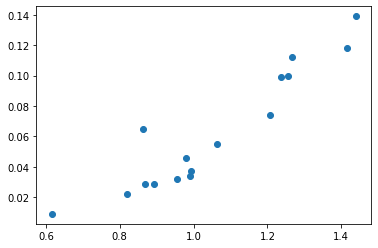

In [115]:
# Questão 4: A força de uma equipe é proporcional a sua probabilidade de vencer a competição? Se não, porquê?
print('Resposta 4:') 
plt.scatter(dados['Força'], sim['Campeão']);

In [120]:
# Questão 5: Qual a probabilidade de todos cabeça de chave passarem simultâneamente para a segunda fase? (Probabilidade da 'zebra')
print('Resposta 5:') 
dados['2fase'] = (sim['1st'] + sim['2nd']).values
dados[dados['Cabeça-de-chave'] == 'Sim']['2fase'].prod()

Resposta 5:


0.10482283627200002

In [124]:
# Questão 6: Qual a probabilidade de pelo menos uma das quatro seleções mais fracas ganhar a competição?
print('Resposta 6:')  
dados['Campeão'] = sim['Campeão'].values
dados.sort_values(by = 'Ranking FIFA (07/04)', ascending = False).iloc[:4, :]['Campeão'].sum()

Resposta 6:


0.125

Resposta 7:


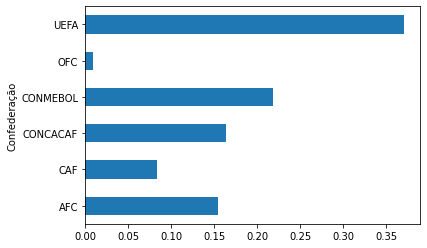

In [126]:
# Questão 7: Qual a probabilidade de vencer a competição por confederação?
print('Resposta 7:')  
dados['Campeão'].groupby(dados['Confederação']).sum().plot(kind = 'barh');

In [127]:
# Questão 8: Qual a probabilidade de uma seleção sem medalhas em sua história vencer a competição?
print('Resposta 8:')  
dados[dados['Ouros'] + dados['Pratas'] + dados['Bronzes'] == 0]['Campeão'].sum()

Resposta 8:


0.358

In [128]:
# Questão 9: Se o Brasil jogar com a Alemanha, qual a probabilidade de acontecer um 7x1 para a Alemanha? E um 7x1 para o Brasil? Quais os placares mais prováveis?
print('Resposta 9:')  
jogo = SimulaJogo('Brasil', 'Alemanha', S = 10000)
jogo[1].tail(10)

Resposta 9:


,Probabilidade
6x6,0.0000
6x7,0.0000
7x0,0.0002
7x1,0.0002
7x2,0.0002
7x3,0.0000
7x4,0.0000
7x5,0.0001
7x6,0.0000
7x7,0.0000


In [129]:
jogo[1].head(16)

,Probabilidade
0x0,0.0759
0x1,0.0847
0x2,0.0501
0x3,0.0248
0x4,0.0055
0x5,0.0011
0x6,0.0005
0x7,0.0001
1x0,0.1119
1x1,0.1220


In [130]:
#Os 10 placares mais prováveis
jogo[1].sort_values(by = 'Probabilidade', ascending = False).head(10)

,Probabilidade
1x1,0.1220
1x0,0.1119
2x1,0.0850
0x1,0.0847
0x0,0.0759
1x2,0.0757
2x0,0.0756
2x2,0.0516
0x2,0.0501
3x1,0.0426


In [131]:
jogo[0]

,Probabilidade
V,0.4232
E,0.2615
D,0.3153


Resposta 10:


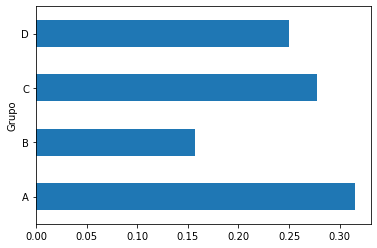

In [132]:
# Questão 10: Qual a probabilidade de cada grupo apresentar um campeão?
print('Resposta 10:')  
dados['Campeão'].groupby(dados['Grupo']).sum().plot(kind = 'barh');

---

## **Planos de continuação!**
2. Propor um modelo para a força dos times (regressão Poisson, por exemplo).
3. Fazer webscrapping de fontes de dados para utilizar na modelagem da força do time.
4. Montar um Dashboard dos resultados da simulação.
5. Fazer gráficos automaticos com formato para redes sociais.
